In [1]:
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
text = open('data/novel.txt','r').read()
print(text)

CHAPTER I.


Manfred, Prince of Otranto, had one son and one daughter: the latter, a
most beautiful virgin, aged eighteen, was called Matilda. Conrad, the
son, was three years younger, a homely youth, sickly, and of no promising
disposition; yet he was the darling of his father, who never showed any
symptoms of affection to Matilda. Manfred had contracted a marriage for
his son with the Marquis of Vicenza’s daughter, Isabella; and she had
already been delivered by her guardians into the hands of Manfred, that
he might celebrate the wedding as soon as Conrad’s infirm state of health
would permit.

Manfred’s impatience for this ceremonial was remarked by his family and
neighbours. The former, indeed, apprehending the severity of their
Prince’s disposition, did not dare to utter their surmises on this
precipitation. Hippolita, his wife, an amiable lady, did sometimes
venture to represent the danger of marrying their only son so early,
considering his great youth, and greater infirmities; 

In [3]:
for c in ['.',',',':',';']:
    text = text.replace(c,'')

In [4]:
text = text.lower()

In [5]:
lines = text.splitlines()
for i in range(len(lines)):
    print(i, lines[i])

0 chapter i
1 
2 
3 manfred prince of otranto had one son and one daughter the latter a
4 most beautiful virgin aged eighteen was called matilda conrad the
5 son was three years younger a homely youth sickly and of no promising
6 disposition yet he was the darling of his father who never showed any
7 symptoms of affection to matilda manfred had contracted a marriage for
8 his son with the marquis of vicenza’s daughter isabella and she had
9 already been delivered by her guardians into the hands of manfred that
10 he might celebrate the wedding as soon as conrad’s infirm state of health
11 would permit
12 
13 manfred’s impatience for this ceremonial was remarked by his family and
14 neighbours the former indeed apprehending the severity of their
15 prince’s disposition did not dare to utter their surmises on this
16 precipitation hippolita his wife an amiable lady did sometimes
17 venture to represent the danger of marrying their only son so early
18 considering his great youth and grea

In [6]:
sw = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

for i in range(len(lines)):
    tokens = lines[i].split()
    
    for token in tokens:
        if token in sw:
            tokens.remove(token)
            
    lines[i] = ' '.join(tokens)
    
    
for line in lines:
    print(line)

chapter


manfred prince otranto one son one daughter latter
beautiful virgin aged eighteen called matilda conrad
son three years younger homely youth sickly of promising
disposition yet was darling his father never showed
symptoms affection matilda manfred contracted marriage
son the marquis vicenza’s daughter isabella she
already delivered her guardians the hands manfred
might celebrate wedding soon conrad’s infirm state health
would permit

manfred’s impatience this ceremonial remarked his family
neighbours former indeed apprehending severity their
prince’s disposition not dare utter surmises this
precipitation hippolita wife amiable lady sometimes
venture represent danger marrying only son early
considering great youth greater infirmities she never
received other answer reflections her sterility had
given but one heir tenants subjects less cautious
discourses attributed hasty wedding the prince’s
dread seeing accomplished ancient prophecy was said have
pronounced the castle lordshi

In [7]:
pos = open('data/positive.txt','r').read().split()
neg = open('data/negative.txt','r').read().split()

In [8]:
score_array = []

for i in range(len(lines)):
    score=0
    words = lines[i].split()
    for word in words:
        if word in pos:
            score += 1
        if word in neg:
            score -= 1
    score_array.append(score)

In [9]:
data = {'Content': lines, 'Score': score_array}
df = pd.DataFrame(data)

In [10]:
df['Delta'] = df['Score'].rolling(3).mean()

In [11]:
df.describe()

,Score,Delta
count,4237.000000,4235.000000
mean,-0.072693,-0.072727
std,0.813544,0.493659
min,-4.000000,-2.666667
25%,0.000000,-0.333333
50%,0.000000,0.000000
75%,0.000000,0.333333
max,4.000000,2.333333


(0.0, 150.0)

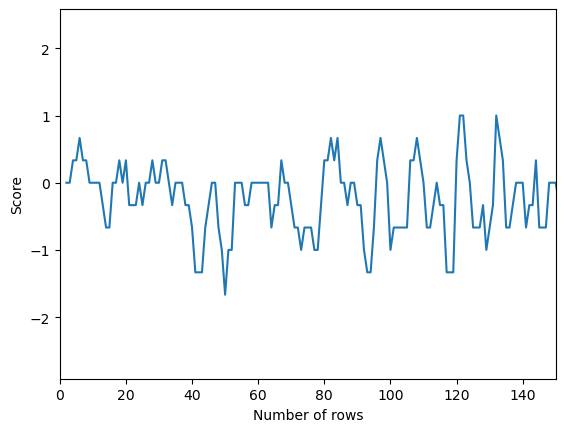

In [12]:
plt.plot(df["Delta"])
plt.xlabel('Number of rows')
plt.ylabel('Score')
plt.xlim((0,150))